In [2]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

In [44]:
# Implementação do nosso bungee jumping

# Parâmetros do nosso modelo
g = 9.8 # Aceleração da gravidade, em m/s2
m = 90 # Massa da pessoa, em kg
𝜌 = 0.8 # Densidade do ar, em kg/m3
Cd = 0.5
h = 1.70 # Altura da pessoa
A = (m*h)/3600 # Área da secção transversal da pessoa
l0 = 10 # Comprimento inicial da corda
vt = 54 # Velocidade terminal do corpo humano em m/s

# Condições iniciais
y = -10
vy = 0

# Listas que serão usadas no ODEINT
dt = 1e-3
ls_tempo = np.arange(0, 20, dt)
cond_inicial = [y,vy]

# Damping
D = 74

# Função que implementa o nosso modelo
def modelo(X,t):
    #D=100
    y = X[0]
    vy = X[1]
    x = (y-l0)
    Ar = (0.5*𝜌*Cd*A*vy**2)
    k = 350
    dhdt = vy
    if y < 0:
        dvydt = g - Ar/m
    else:
        dvydt = g - Ar/m - (k*x)/m - (D*vy)/m
    derivadas = [dhdt,dvydt]
    return derivadas

# Resultado do ODEINT
result = odeint(modelo,cond_inicial,ls_tempo)
h = result[:,0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


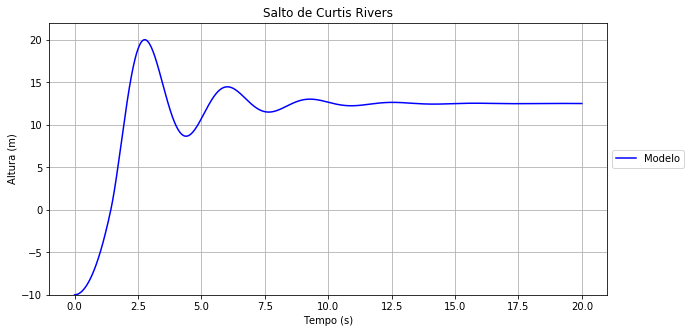

A CORDA ESTICOU 20.032939241824387 METROS


In [45]:
# Plotando gráfico do modelo
fig = plt.figure(figsize=(10,5))
plt.title("Salto de Curtis Rivers")
ax = fig.add_subplot(111)
plt.plot(ls_tempo,h, 'b-', label="Modelo")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura (m)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
ax.set_ylim(-10, 22)
plt.show()

stretch = max(h)
print('A CORDA ESTICOU {0} METROS'.format(stretch))